# Project name ---> Handwritten Digit Recognition! 

In [76]:
# importing all nessry libraries 
import os
import pandas as pd 
import numpy as np
import seaborn as sns
from PIL import Image 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### loading dataset from zip file direclty without csv file 

In [ ]:
# loading datasets 
import zipfile
import os

zip_path = r"C:\Users\Ravichandran\Downloads\archive (7).zip"   #  zip file path
extract_path ="dataset"
# folder to extract giving name to file  
# and i am using this "." becouse if i  run again this will always create a subfolder called dataset
# Note :-  if already extarcted if not dont use 
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)



Extracted to: dataset


### Successfuly extarcted dataset from zip files

### Load Images Automatically (No CSV Needed)
#### Converts raw image files into numerical arrays that machine learning algorithms can understand and process

In [ ]:
from PIL import Image 
#PIL.Image → library to open and process images (resize, convert to grayscale,
#  and also A library for manipulating, and saving many different image file formats
X = [] # for futures 
y = [] # for target

# Loop over each class folder
for label in range(10):  # since digits are 0-9
    folder = os.path.join(extract_path, str(label))
    for file in os.listdir(folder):   # file (image)
        file_path = os.path.join(folder, file)
        try:
            img = Image.open(file_path).convert("L") 
            # grayscale makes one channel or removes color channels (RGB → 1 channel), makes processing easier.
            
            img = img.resize((28, 28))                # make uniform size
            img_array = np.array(img).flatten()       # flatten to 784 vector or # flatten to 1D vector  (Feature Engineering)
            # Converts image to numbers and  Result: [25, 20, 15, 12, 8, 0, 0, 255, 200, ...] 784 numbers total
            
            X.append(img_array) #  img_array.shape = (784,)
            y.append(label)
        except:
            continue

X = np.array(X)
y = np.array(y)

print("Dataset shape:", X.shape, y.shape)


Dataset shape: (31715, 784) (31715,)


In [ ]:
# checking how many folders are created (ignore extarnal datsets)
print(os.listdir("dataset")) # inside dataset/ 

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'dataset']


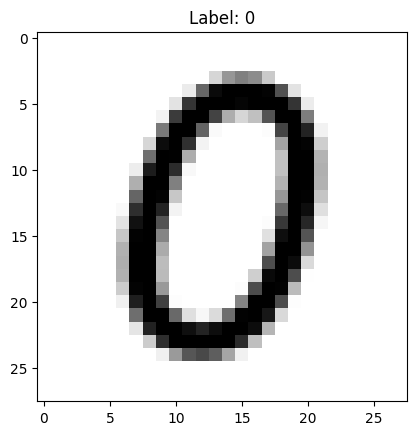

In [110]:
#  images are flattened (784,), need to reshape them back to 28x28 for visualization:
# Display Sample Images (one image)
import matplotlib.pyplot as plt

# Reshape first image from 784 → 28x28
sample_image = X[50].reshape(28, 28) # giving indexing X[index]

# Display
plt.imshow(sample_image, cmap='gray')
plt.title(f'Label: {y[0]}')
plt.show()

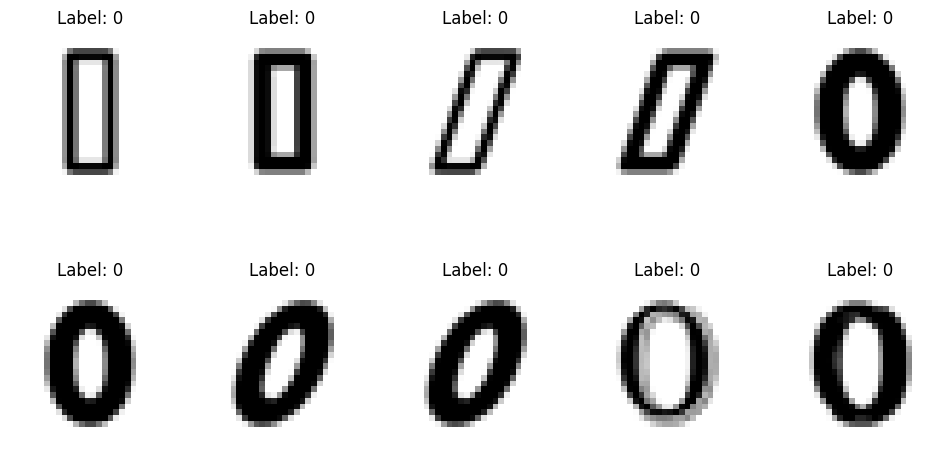

In [112]:
# Multiple images using subplots and (shows different shapes)
# Show first 10 images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    ax = axes[i//5, i%5] #  ax is each individual plot box
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y[i]}')
    ax.axis('off') # Removes the axis lines, ticks, labels, and grid - everything except the actual image
plt.show()

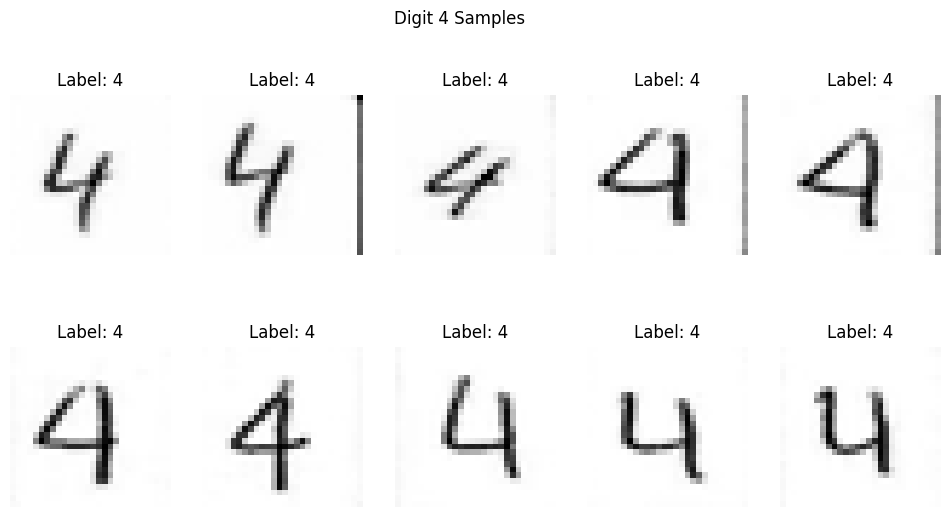

In [ ]:
# To see digit "1 to 9" samples instead of "0":
digit_to_show = 4  # Change  number to (0-9) 

# Finding all indices where y equals to  chosen digit
digit_indices = np.where(y == digit_to_show)[0] #extracts the first (and only) dimension of the result 

# Show first 10 samples of that digit
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    if i < len(digit_indices):
        idx = digit_indices[i]
        ax = axes[i//5, i%5]
        ax.imshow(X[idx].reshape(28, 28), cmap='gray')
        ax.set_title(f'Label: {y[idx]}')
        ax.axis('off')
plt.suptitle(f'Digit {digit_to_show} Samples')
plt.show()

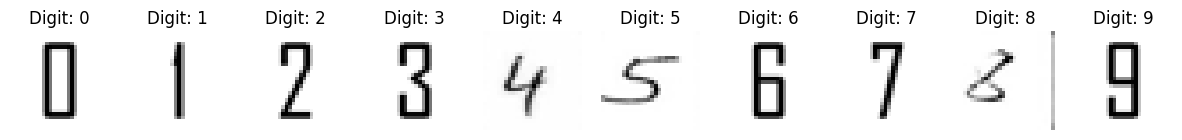

In [117]:
# Show one sample from each digit (0-9)
plt.figure(figsize=(15, 3))
for digit in range(10):
    digit_indices = np.where(y == digit)[0]
    sample_idx = digit_indices[0]  # First sample of each digit
    
    plt.subplot(1, 10, digit + 1)
    plt.imshow(X[sample_idx].reshape(28, 28), cmap='gray')
    plt.title(f'Digit: {digit}')
    plt.axis('off')
plt.show()